# Analyze the data
## Descriptive Analysis for Car Accidents in Washington D.C
### Zaid Altukhi
### DR. LIAO, PH.D.
George Mason University
| AIT 614: Big Data Essentials


# Import the libraries and packages

In [31]:
import numpy as np
import pandas as pd
import altair as alt
alt.data_transformers.enable('default', max_rows=None)

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore')
from scipy import stats
import scipy.stats as st


import matplotlib.pyplot as pltfrom 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs




# Import the data

In [32]:
df = pd.read_csv('/Volumes/LOVUN/George Mason Files/Fall 2021/AIT 614/project/data/Nov21_datasset.csv')

In [18]:
df.groupby([pd.DatetimeIndex(df['REPORTDATE']).year]).size()

REPORTDATE
2009    11982
2010    12138
2011    13265
2012    16682
2013    17418
2014    19225
2015    22220
2016    26470
2017    26381
2018    26471
2019    26711
2020    18230
dtype: int64

#### convert from int to object

In [3]:
df['OBJECTID'] = df['OBJECTID'].apply(str)
df['CRIMEID'] = df['CRIMEID'].apply(str)
df['ROUTEID'] = df['ROUTEID'].apply(str)
df['MARID'] = df['MARID'].apply(str)

#### convert date time

In [4]:
df['REPORTDATE']= pd.to_datetime(df['REPORTDATE'])
df['FROMDATE']= pd.to_datetime(df['FROMDATE'])

In [5]:
df=df.drop(['Unnamed: 0'], axis=1)

# Explore The data

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237193 entries, 0 to 237192
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   X                           237193 non-null  float64            
 1   Y                           237193 non-null  float64            
 2   OBJECTID                    237193 non-null  object             
 3   CRIMEID                     237193 non-null  object             
 4   CCN                         237193 non-null  object             
 5   REPORTDATE                  237193 non-null  datetime64[ns, UTC]
 6   ROUTEID                     237193 non-null  object             
 7   MEASURE                     237193 non-null  float64            
 8   OFFSET                      237193 non-null  float64            
 9   FROMDATE                    237193 non-null  datetime64[ns, UTC]
 10  MARID                       237193 non-null 

In [4]:
df.columns

Index(['Unnamed: 0', 'X', 'Y', 'OBJECTID', 'CRIMEID', 'CCN', 'REPORTDATE',
       'ROUTEID', 'MEASURE', 'OFFSET', 'FROMDATE', 'MARID', 'ADDRESS',
       'LATITUDE', 'LONGITUDE', 'XCOORD', 'YCOORD', 'EVENTID',
       'MAJORINJURIES_BICYCLIST', 'MINORINJURIES_BICYCLIST',
       'UNKNOWNINJURIES_BICYCLIST', 'FATAL_BICYCLIST', 'MAJORINJURIES_DRIVER',
       'MINORINJURIES_DRIVER', 'UNKNOWNINJURIES_DRIVER', 'FATAL_DRIVER',
       'MAJORINJURIES_PEDESTRIAN', 'MINORINJURIES_PEDESTRIAN',
       'UNKNOWNINJURIES_PEDESTRIAN', 'FATAL_PEDESTRIAN', 'TOTAL_VEHICLES',
       'TOTAL_BICYCLES', 'TOTAL_PEDESTRIANS', 'PEDESTRIANSIMPAIRED',
       'BICYCLISTSIMPAIRED', 'DRIVERSIMPAIRED', 'TOTAL_TAXIS',
       'TOTAL_GOVERNMENT', 'SPEEDING_INVOLVED', 'NEARESTINTROUTEID',
       'NEARESTINTSTREETNAME', 'OFFINTERSECTION', 'INTAPPROACHDIRECTION',
       'FATALPASSENGER', 'MAJORINJURIESPASSENGER', 'MINORINJURIESPASSENGER',
       'UNKNOWNINJURIESPASSENGER', 'TOTAL_FATAL', 'TOTAL_MAJORINJURIES',
       'TOTAL_M

# Prepare data to analyze

## Lable the data [data1]

In [29]:
# Build a function
def label_encode_fit(data, columns):
    result = df.copy()
    cat_col = ['ADDRESS','NEARESTINTSTREETNAME','NEARESTINTROUTEID','INTAPPROACHDIRECTION','Rate']
    encoders = {}
    for column in cat_col:
        encoder = preprocessing.LabelEncoder()
        result[column] = encoder.fit_transform(result[column])
        encoders[column] = encoder
    return result, encoders
    

In [30]:
#implement the funciton
data1, encoders1 = label_encode_fit(df,df.columns)


In [31]:
data1

X          Y   OBJECTID   CRIMEID       CCN  \
0      -77.012309  38.883767  232751353  28437811  20087579   
1      -77.061186  38.905239  232751354  28437812  20087117   
2      -77.038511  38.903591  232751355  28437819  20087584   
3      -77.006172  38.824301  232751356  28437830  20087570   
4      -77.051487  38.897180  232751357  28437840  20087610   
...           ...        ...        ...       ...       ...   
237188 -76.990197  38.923131  233008672  28009126  19062200   
237189 -77.002039  38.900510  233008673  28009130  19062181   
237190 -77.017548  38.878621  233008674  28009131  19062204   
237191 -76.988262  38.940500  233008675  28009135  19062303   
237192 -77.085972  38.938275  233008676  28009161  19062359   

                      REPORTDATE          ROUTEID  MEASURE  OFFSET  \
0      2020-06-13 20:37:33+00:00         15048461  2380.00    0.83   
1      2020-06-13 20:38:01+00:00         11003102   288.30    3.83   
2      2020-06-13 21:06:15+00:00         11001702  1669.82   20.83   
3      2020-06-13 22:45:04+00:00         15081252  7507.86    2.95   
4      2020-06-13 22:19:36+00:00  Route not found     0.00    0.00   
...                          ...              ...      ...     ...   
237188 2019-04-13 04:06:42+00:00                0     0.00    0.05   
237189 2019-04-13 04:10:49+00:00                0     0.00    0.66   
237190 2019-04-13 04:10:53+00:00         14000402  1156.60    9.38   
237191 2019-04-13 04:14:48+00:00                0     0.00   41.00   
237192 2019-04-13 04:46:54+00:00         11090702   183.54   37.12   

                        FROMDATE  ... UNKNOWNINJURIESPASSENGER  TOTAL_FATAL  \
0      2020-06-13 04:00:00+00:00  ...                        0            0   
1      2020-06-12 04:00:00+00:00  ...                        0            0   
2      2020-06-12 04:00:00+00:00  ...                        0            0   
3      2020-06-13 04:00:00+00:00  ...                        0            0   
4      2020-06-13 04:00:00+00:00  ...                        0            0   
...                          ...  ...                      ...          ...   
237188 2019-04-12 04:00:00+00:00  ...                        0            0   
237189 2019-04-12 04:00:00+00:00  ...                        0            0   
237190 2019-04-12 04:00:00+00:00  ...                        0            0   
237191 2019-04-12 04:00:00+00:00  ...                        0            0   
237192 2019-04-12 04:00:00+00:00  ...                        0            0   

        TOTAL_MAJORINJURIES  TOTAL_MINORINJURIES  TOTAL_UNKNOWNINJURIES  \
0                         0                    0                      0   
1                         0                    0                      0   
2                         0                    0                      0   
3                         0                    1                      0   
4                         0                    0                      0   
...                     ...                  ...                    ...   
237188                    0                    0                      0   
237189                    0                    0                      0   
237190                    0                    0                      0   
237191                    0                    1                      0   
237192                    0                    0                      0   

        TOTAL_ACCEIDENTELEMENTS FATAL  TOTAL_INJURIES  \
0                             3     0               0   
1                             2     0               0   
2                             2     0               0   
3                             2     0               1   
4                             2     0               0   
...                         ...   ...             ...   
237188                        2     0               0   
237189                        2     0               0   
237190                        2     0               0  

In [32]:
# subset the labled dataset
data1 = data1 [['CCN','FROMDATE','ADDRESS','XCOORD', 'YCOORD','MAJORINJURIES_BICYCLIST', 'MINORINJURIES_BICYCLIST',
       'UNKNOWNINJURIES_BICYCLIST', 'FATAL_BICYCLIST', 'MAJORINJURIES_DRIVER',
       'MINORINJURIES_DRIVER', 'UNKNOWNINJURIES_DRIVER', 'FATAL_DRIVER',
       'MAJORINJURIES_PEDESTRIAN', 'MINORINJURIES_PEDESTRIAN',
       'UNKNOWNINJURIES_PEDESTRIAN', 'FATAL_PEDESTRIAN', 'TOTAL_VEHICLES',
       'TOTAL_BICYCLES', 'TOTAL_PEDESTRIANS', 'PEDESTRIANSIMPAIRED',
       'BICYCLISTSIMPAIRED', 'DRIVERSIMPAIRED', 'TOTAL_TAXIS',
       'TOTAL_GOVERNMENT', 'SPEEDING_INVOLVED', 'NEARESTINTROUTEID',
       'NEARESTINTSTREETNAME', 'OFFINTERSECTION', 'INTAPPROACHDIRECTION',
       'FATALPASSENGER', 'MAJORINJURIESPASSENGER', 'MINORINJURIESPASSENGER',
       'UNKNOWNINJURIESPASSENGER', 'TOTAL_FATAL', 'TOTAL_MAJORINJURIES',
       'TOTAL_MINORINJURIES', 'TOTAL_UNKNOWNINJURIES',
       'TOTAL_ACCEIDENTELEMENTS', 'TOTAL_INJURIES','TOTAL_INJURIES_ELEMENTS', 'Rate']]

In [33]:
data1.describe()

ADDRESS         XCOORD         YCOORD  MAJORINJURIES_BICYCLIST  \
count  237193.000000  237193.000000  237193.000000            237193.000000   
mean    45881.542073  399260.300705  137423.659793                 0.001615   
std     27318.627204    3141.062430    3425.134140                 0.040256   
min         0.000000  390050.862000  126708.403000                 0.000000   
25%     22396.000000  397201.939000  135641.110000                 0.000000   
50%     45135.000000  399047.974000  137404.641000                 0.000000   
75%     70294.000000  401274.380000  139405.739000                 0.000000   
max     94053.000000  407848.390000  147423.652000                 2.000000   

       MINORINJURIES_BICYCLIST  UNKNOWNINJURIES_BICYCLIST  FATAL_BICYCLIST  \
count            237193.000000              237193.000000    237193.000000   
mean                  0.010991                   0.000569         0.000051   
std                   0.104705                   0.023850         0.007113   
min                   0.000000                   0.000000         0.000000   
25%                   0.000000                   0.000000         0.000000   
50%                   0.000000                   0.000000         0.000000   
75%                   0.000000                   0.000000         0.000000   
max                   2.000000                   1.000000         1.000000   

       MAJORINJURIES_DRIVER  MINORINJURIES_DRIVER  UNKNOWNINJURIES_DRIVER  \
count         237193.000000         237193.000000           237193.000000   
mean               0.071136              0.174929                0.065225   
std                0.292611              0.434725                0.262628   
min                0.000000              0.000000                0.000000   
25%                0.000000              0.000000                0.000000   
50%                0.000000              0.000000                0.000000   
75%                0.000000              0.000000                0.000000   
max                7.000000             11.000000                5.000000   

       ...  MINORINJURIESPASSENGER  UNKNOWNINJURIESPASSENGER    TOTAL_FATAL  \
count  ...           237193.000000             237193.000000  237193.000000   
mean   ...                0.079994                  0.009520       0.002007   
std    ...                0.378197                  0.131995       0.045961   
min    ...                0.000000                  0.000000       0.000000   
25%    ...                0.000000                  0.000000       0.000000   
50%    ...                0.000000                  0.000000       0.000000   
75%    ...                0.000000                  0.000000       0.000000   
max    ...               17.000000                 15.000000       2.000000   

       TOTAL_MAJORINJURIES  TOTAL_MINORINJURIES  TOTAL_UNKNOWNINJURIES  \
count        237193.000000        237193.000000          237193.000000   
mean              0.109531             0.295856               0.076566   
std               0.459874             0.656691               0.311264   
min               0.000000             0.000000               0.000000   
25%               0.000000             0.000000               0.000000   
50%               0.000000             0.000000               0.000000   
75%               0.000000             0.000000               0.000000   
max              51.000000            19.000000              16.000000   

       TOTAL_ACCEIDENTELEMENTS  TOTAL_INJURIES  TOTAL_INJURIES_ELEMENTS  \
count            237193.000000   237193.000000            237193.000000   
mean                  2.245682        0.481954                 2.727635   
std                   0.663670        0.838257                 1.096224   
min                   0.000000        0.000000                 1.000000   
25%                   2.000000        0.000000                 2.000000   
50%                   2.000000        0.000000                 3.000000   


### Extract labeled data

In [34]:
data1.to_csv('/Volumes/LOVUN/George Mason Files/Fall 2021/AIT 614/project/data/data1.csv', index=False)

# Stat Analysis

## Group the data by Rate

In [33]:
data1 = pd.read_csv('/Volumes/LOVUN/George Mason Files/Fall 2021/AIT 614/project/data/data1.csv')

In [35]:
data1['FATAL'] = np.where(data1['TOTAL_FATAL']>= 1, 1, 0)

In [5]:
data1.describe()

ADDRESS         XCOORD         YCOORD  MAJORINJURIES_BICYCLIST  \
count  237193.000000  237193.000000  237193.000000            237193.000000   
mean    45881.542073  399260.300705  137423.659793                 0.001615   
std     27318.627204    3141.062430    3425.134140                 0.040256   
min         0.000000  390050.862000  126708.403000                 0.000000   
25%     22396.000000  397201.939000  135641.110000                 0.000000   
50%     45135.000000  399047.974000  137404.641000                 0.000000   
75%     70294.000000  401274.380000  139405.739000                 0.000000   
max     94053.000000  407848.390000  147423.652000                 2.000000   

       MINORINJURIES_BICYCLIST  UNKNOWNINJURIES_BICYCLIST  FATAL_BICYCLIST  \
count            237193.000000              237193.000000    237193.000000   
mean                  0.010991                   0.000569         0.000051   
std                   0.104705                   0.023850         0.007113   
min                   0.000000                   0.000000         0.000000   
25%                   0.000000                   0.000000         0.000000   
50%                   0.000000                   0.000000         0.000000   
75%                   0.000000                   0.000000         0.000000   
max                   2.000000                   1.000000         1.000000   

       MAJORINJURIES_DRIVER  MINORINJURIES_DRIVER  UNKNOWNINJURIES_DRIVER  \
count         237193.000000         237193.000000           237193.000000   
mean               0.071136              0.174929                0.065225   
std                0.292611              0.434725                0.262628   
min                0.000000              0.000000                0.000000   
25%                0.000000              0.000000                0.000000   
50%                0.000000              0.000000                0.000000   
75%                0.000000              0.000000                0.000000   
max                7.000000             11.000000                5.000000   

       ...  UNKNOWNINJURIESPASSENGER    TOTAL_FATAL  TOTAL_MAJORINJURIES  \
count  ...             237193.000000  237193.000000        237193.000000   
mean   ...                  0.009520       0.002007             0.109531   
std    ...                  0.131995       0.045961             0.459874   
min    ...                  0.000000       0.000000             0.000000   
25%    ...                  0.000000       0.000000             0.000000   
50%    ...                  0.000000       0.000000             0.000000   
75%    ...                  0.000000       0.000000             0.000000   
max    ...                 15.000000       2.000000            51.000000   

       TOTAL_MINORINJURIES  TOTAL_UNKNOWNINJURIES  TOTAL_ACCEIDENTELEMENTS  \
count        237193.000000          237193.000000            237193.000000   
mean              0.295856               0.076566                 2.245682   
std               0.656691               0.311264                 0.663670   
min               0.000000               0.000000                 0.000000   
25%               0.000000               0.000000                 2.000000   
50%               0.000000               0.000000                 2.000000   
75%               0.000000               0.000000                 3.000000   
max              19.000000              16.000000                17.000000   

       TOTAL_INJURIES  TOTAL_INJURIES_ELEMENTS           Rate          FATAL  
count   237193.000000            237193.000000  237193.000000  237193.000000  
mean         0.481954                 2.727635       2.488851       0.001952  
std          0.838257                 1.096224       0.501527       0.044138  
min          0.000000                 1.000000       0.000000       0.000000  
25%          0.000000                 2.000000       2.000000       0.000000  
50%          0.000000                 3.00

## Confidence Intervals

In [40]:
import pandas as pd
import numpy as np
import math
from scipy import stats

likes_ic = df.groupby(['Rate'])['TOTAL_INJURIES_ELEMENTS'].agg(['mean', 'count', 'std'])


ci95_hi = []
ci95_lo = []

for i in likes_ic.index:
    m, c, s = likes_ic.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

likes_ic['ci95_hi'] = ci95_hi
likes_ic['ci95_lo'] = ci95_lo
likes_ic

mean   count       std    ci95_hi    ci95_lo
Rate                                                     
extrem  43.166667       6  9.495613  50.764740  35.568594
high    16.959184      49  3.529396  17.947414  15.970953
low      3.483415  121254  0.907489   3.488523   3.478307
lowest   1.917818  115755  0.274643   1.919400   1.916236
medium  11.713178     129  0.762334  11.844733  11.581624

In [41]:
import pandas as pd
import numpy as np
import math
from scipy import stats

likes_ic = df.groupby(['Rate'])['TOTAL_INJURIES'].agg(['mean', 'count', 'std'])


ci95_hi = []
ci95_lo = []

for i in likes_ic.index:
    m, c, s = likes_ic.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

likes_ic['ci95_hi'] = ci95_hi
likes_ic['ci95_lo'] = ci95_lo
likes_ic

mean   count       std    ci95_hi    ci95_lo
Rate                                                     
extrem  40.500000       6  9.332738  47.967746  33.032254
high    10.836735      49  5.817885  12.465743   9.207727
low      0.899179  121254  0.888934   0.904182   0.894175
lowest   0.031610  115755  0.175009   0.032618   0.030602
medium   6.620155     129  2.713375   7.088398   6.151912

In [42]:
import pandas as pd
import numpy as np
import math
from scipy import stats

likes_ic = df.groupby(['Rate'])['TOTAL_ACCEIDENTELEMENTS'].agg(['mean', 'count', 'std'])


ci95_hi = []
ci95_lo = []

for i in likes_ic.index:
    m, c, s = likes_ic.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

likes_ic['ci95_hi'] = ci95_hi
likes_ic['ci95_lo'] = ci95_lo
likes_ic

mean   count       std   ci95_hi   ci95_lo
Rate                                                  
extrem  2.666667       6  0.816497  3.320000  2.013333
high    6.122449      49  4.366695  7.345124  4.899774
low     2.584236  121254  0.705253  2.588206  2.580267
lowest  1.886208  115755  0.317913  1.888039  1.884376
medium  5.093023     129  2.661772  5.552361  4.633686

In [44]:
import pandas as pd
import numpy as np
import math
from scipy import stats

likes_ic = df.groupby(['Rate'])['TOTAL_FATAL'].agg(['mean', 'count', 'std'])


ci95_hi = []
ci95_lo = []

for i in likes_ic.index:
    m, c, s = likes_ic.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

likes_ic['ci95_hi'] = ci95_hi
likes_ic['ci95_lo'] = ci95_lo
likes_ic

mean   count       std   ci95_hi   ci95_lo
Rate                                                  
extrem  0.000000       6  0.000000  0.000000  0.000000
high    0.061224      49  0.316765  0.149919 -0.027470
low     0.001748  121254  0.043137  0.001991  0.001506
lowest  0.002212  115755  0.047886  0.002487  0.001936
medium  0.038760     129  0.193774  0.072199  0.005320

### TOTAL_INJURIES_ELEMENTS

In [36]:
print("Confidence Intervals 90% " ,st.t.interval(alpha=0.90, df=len(df['TOTAL_INJURIES_ELEMENTS'])-1, loc=np.mean(df['TOTAL_INJURIES_ELEMENTS']), scale=st.sem(df['TOTAL_INJURIES_ELEMENTS'])) )
print("Confidence Intervals 95% " ,st.t.interval(alpha=0.95, df=len(df['TOTAL_INJURIES_ELEMENTS'])-1, loc=np.mean(df['TOTAL_INJURIES_ELEMENTS']), scale=st.sem(df['TOTAL_INJURIES_ELEMENTS'])) )


Confidence Intervals 90%  (2.7239329516678836, 2.7313376507529297)
Confidence Intervals 95%  (2.7232236743455616, 2.7320469280752517)


### Total Injuries

In [37]:
import scipy.stats as st
print("Confidence Intervals 90% " ,st.t.interval(alpha=0.90, df=len(df['TOTAL_INJURIES'])-1, loc=np.mean(df['TOTAL_INJURIES']), scale=st.sem(df['TOTAL_INJURIES'])) )
print("Confidence Intervals 95% " ,st.t.interval(alpha=0.95, df=len(df['TOTAL_INJURIES'])-1, loc=np.mean(df['TOTAL_INJURIES']), scale=st.sem(df['TOTAL_INJURIES'])) )


Confidence Intervals 90%  (0.4791224132915862, 0.48478461600523115)
Confidence Intervals 95%  (0.47858004527189335, 0.485326984024924)


### TOTAL_ACCEIDENTELEMENTS

In [21]:
print("Confidence Intervals 90% " ,st.t.interval(alpha=0.90, df=len(df['TOTAL_ACCEIDENTELEMENTS'])-1, loc=np.mean(df['TOTAL_ACCEIDENTELEMENTS']), scale=st.sem(df['TOTAL_ACCEIDENTELEMENTS'])) )
print("Confidence Intervals 95% " ,st.t.interval(alpha=0.95, df=len(df['TOTAL_ACCEIDENTELEMENTS'])-1, loc=np.mean(df['TOTAL_ACCEIDENTELEMENTS']), scale=st.sem(df['TOTAL_ACCEIDENTELEMENTS'])) )


Confidence Intervals 90%  (2.243440330017878, 2.247923243106118)
Confidence Intervals 95%  (2.243010923156788, 2.248352649967208)


### TOTAL_FATAL

In [22]:
print("Confidence Intervals 90% " ,st.t.interval(alpha=0.90, df=len(df['TOTAL_FATAL'])-1, loc=np.mean(df['TOTAL_FATAL']), scale=st.sem(df['TOTAL_FATAL'])))
print("Confidence Intervals 95% " ,st.t.interval(alpha=0.95, df=len(df['TOTAL_FATAL'])-1, loc=np.mean(df['TOTAL_FATAL']), scale=st.sem(df['TOTAL_FATAL'])) 
)

Confidence Intervals 90%  (0.001851577943077073, 0.0021620312275139643)
Confidence Intervals 95%  (0.0018218404113067225, 0.002191768759284315)


### TOTAL_MAJORINJURIES

In [23]:
print("Confidence Intervals 90% " ,st.t.interval(alpha=0.90, df=len(df['TOTAL_MAJORINJURIES'])-1, loc=np.mean(df['TOTAL_MAJORINJURIES']), scale=st.sem(df['TOTAL_MAJORINJURIES'])))
print("Confidence Intervals 95% " ,st.t.interval(alpha=0.95, df=len(df['TOTAL_MAJORINJURIES'])-1, loc=np.mean(df['TOTAL_MAJORINJURIES']), scale=st.sem(df['TOTAL_MAJORINJURIES'])) 
)

Confidence Intervals 90%  (0.10797789382697714, 0.11108422014771857)
Confidence Intervals 95%  (0.10768034671672616, 0.11138176725796956)


### TOTAL_MINORINJURIES

In [24]:
print("Confidence Intervals 90% " ,st.t.interval(alpha=0.90, df=len(df['TOTAL_MINORINJURIES'])-1, loc=np.mean(df['TOTAL_MINORINJURIES']), scale=st.sem(df['TOTAL_MINORINJURIES'])))
print("Confidence Intervals 95% " ,st.t.interval(alpha=0.95, df=len(df['TOTAL_MINORINJURIES'])-1, loc=np.mean(df['TOTAL_MINORINJURIES']), scale=st.sem(df['TOTAL_MINORINJURIES'])) 
)

Confidence Intervals 90%  (0.29363823304973846, 0.29807400129107264)
Confidence Intervals 95%  (0.2932133420738165, 0.2984988922669946)


In [16]:
TOTAL_ACCEIDENTELEMENTS_rate = df.groupby('Rate')
for category, value in TOTAL_ACCEIDENTELEMENTS_rate['TOTAL_ACCEIDENTELEMENTS']:
    print((category, value.sum()))

('extrem', 16)
('high', 300)
('low', 313349)
('lowest', 218338)
('medium', 657)


In [29]:
TOTAL_MAJORINJURIES = df.groupby('Rate')
for category, value in TOTAL_MAJORINJURIES['TOTAL_MAJORINJURIES']:
    print((category, value.sum()))

('extrem', 241)
('high', 188)
('low', 24486)
('lowest', 851)
('medium', 214)


In [30]:
TOTAL_FATAL_rate = df.groupby('Rate')
for category, value in TOTAL_FATAL_rate['TOTAL_FATAL']:
    print((category, value.sum()))

('extrem', 0)
('high', 3)
('low', 212)
('lowest', 256)
('medium', 5)


In [31]:
groupby_rate = df.groupby('Rate')
for category, value in groupby_rate['TOTAL_INJURIES_ELEMENTS']:
    print((category, value.mean()))

('extrem', 43.166666666666664)
('high', 16.959183673469386)
('low', 3.4834149801243672)
('lowest', 1.917817804846443)
('medium', 11.713178294573643)


In [32]:
groupby_rate.describe()

X                                                         \
           count       mean        std        min        25%        50%   
Rate                                                                      
extrem       6.0 -77.003282   0.021317 -77.023991 -77.011715 -77.007007   
high        49.0 -72.838124  16.471761 -77.082162 -77.018112 -77.003571   
low     121254.0 -76.330626   6.757121 -77.116524 -77.031961 -77.011341   
lowest  115755.0 -76.319013   6.820577 -78.815503 -77.031968 -77.009100   
medium     129.0 -75.939724   8.433171 -77.082939 -77.019609 -76.994964   

                                     Y             ... TOTAL_INJURIES        \
              75%        max     count       mean  ...            75%   max   
Rate                                               ...                        
extrem -77.006577 -76.961967       6.0  38.888482  ...          49.25  51.0   
high   -76.979070  -8.999980      49.0  35.965072  ...          14.00  26.0   
low    -76.985120  -8.999980  121254.0  38.426728  ...           1.00   8.0   
lowest -76.983444  76.997681  115755.0  38.419535  ...           0.00   2.0   
medium -76.966757  -8.999980     129.0  38.149849  ...           9.00  11.0   

       TOTAL_INJURIES_ELEMENTS                                                \
                         count       mean       std   min   25%   50%    75%   
Rate                                                                           
extrem                     6.0  43.166667  9.495613  33.0  36.0  41.0  51.25   
high                      49.0  16.959184  3.529396  14.0  15.0  15.0  18.00   
low                   121254.0   3.483415  0.907489   3.0   3.0   3.0   4.00   
lowest                115755.0   1.917818  0.274643   1.0   2.0   2.0   2.00   
medium                   129.0  11.713178  0.762334  11.0  11.0  12.0  12.00   

              
         max  
Rate          
extrem  55.0  
high    28.0  
low     10.0  
lowest   2.0  
medium  13.0  

[5 rows x 328 columns]

## Correlations

In [34]:
mean_sub_lable1 =data1.groupby(['Rate'], as_index=False).mean()

mean_sub_lable1

Rate       ADDRESS         XCOORD         YCOORD  MAJORINJURIES_BICYCLIST  \
0     0  69336.500000  399715.840833  135626.020333                 0.000000   
1     1  45449.306122  399928.826612  136522.968510                 0.000000   
2     2  45895.235967  399242.549781  137446.187120                 0.003142   
3     3  45867.738353  399277.150188  137402.129489                 0.000017   
4     4  44469.604651  400550.746899  135994.448000                 0.000000   

   MINORINJURIES_BICYCLIST  UNKNOWNINJURIES_BICYCLIST  FATAL_BICYCLIST  \
0                 0.000000                   0.000000         0.000000   
1                 0.000000                   0.000000         0.000000   
2                 0.021484                   0.001113         0.000049   
3                 0.000017                   0.000000         0.000052   
4                 0.000000                   0.000000         0.000000   

   MAJORINJURIES_DRIVER  MINORINJURIES_DRIVER  ...  MAJORINJURIESPASSENGER  \
0              0.166667              0.000000  ...               40.000000   
1              0.428571              1.408163  ...                3.183673   
2              0.132218              0.324806  ...                0.040584   
3              0.006522              0.016302  ...                0.000760   
4              0.496124              1.178295  ...                0.984496   

   MINORINJURIESPASSENGER  UNKNOWNINJURIESPASSENGER  TOTAL_FATAL  \
0                0.333333                  0.000000     0.000000   
1                4.061224                  0.816327     0.061224   
2                0.149867                  0.017030     0.001748   
3                0.002445                  0.000492     0.002212   
4                2.465116                  0.744186     0.038760   

   TOTAL_MAJORINJURIES  TOTAL_MINORINJURIES  TOTAL_UNKNOWNINJURIES  \
0            40.166667             0.333333               0.000000   
1             3.836735             5.938776               1.061224   
2             0.201940             0.554266               0.142973   
3             0.007352             0.018867               0.005391   
4             1.658915             3.806202               1.155039   

   TOTAL_ACCEIDENTELEMENTS  TOTAL_INJURIES  TOTAL_INJURIES_ELEMENTS  
0                 2.666667       40.500000                43.166667  
1                 6.122449       10.836735                16.959184  
2                 2.584236        0.899179                 3.483415  
3                 1.886208        0.031610                 1.917818  
4                 5.093023        6.620155                11.713178  

[5 rows x 40 columns]

In [39]:
mean_sub_lable1.columns

Index(['Rate', 'ADDRESS', 'XCOORD', 'YCOORD', 'MAJORINJURIES_BICYCLIST',
       'MINORINJURIES_BICYCLIST', 'UNKNOWNINJURIES_BICYCLIST',
       'FATAL_BICYCLIST', 'MAJORINJURIES_DRIVER', 'MINORINJURIES_DRIVER',
       'UNKNOWNINJURIES_DRIVER', 'FATAL_DRIVER', 'MAJORINJURIES_PEDESTRIAN',
       'MINORINJURIES_PEDESTRIAN', 'UNKNOWNINJURIES_PEDESTRIAN',
       'FATAL_PEDESTRIAN', 'TOTAL_VEHICLES', 'TOTAL_BICYCLES',
       'TOTAL_PEDESTRIANS', 'PEDESTRIANSIMPAIRED', 'BICYCLISTSIMPAIRED',
       'DRIVERSIMPAIRED', 'TOTAL_TAXIS', 'TOTAL_GOVERNMENT',
       'SPEEDING_INVOLVED', 'NEARESTINTROUTEID', 'NEARESTINTSTREETNAME',
       'OFFINTERSECTION', 'INTAPPROACHDIRECTION', 'FATALPASSENGER',
       'MAJORINJURIESPASSENGER', 'MINORINJURIESPASSENGER',
       'UNKNOWNINJURIESPASSENGER', 'TOTAL_FATAL', 'TOTAL_MAJORINJURIES',
       'TOTAL_MINORINJURIES', 'TOTAL_UNKNOWNINJURIES',
       'TOTAL_ACCEIDENTELEMENTS', 'TOTAL_INJURIES', 'TOTAL_INJURIES_ELEMENTS'],
      dtype='object')

In [45]:
mean_sub_lable2= mean_sub_lable1[[
       'TOTAL_VEHICLES', 
       'TOTAL_PEDESTRIANS', 'PEDESTRIANSIMPAIRED', 
       'DRIVERSIMPAIRED', 'TOTAL_TAXIS', 'TOTAL_GOVERNMENT',
       'SPEEDING_INVOLVED', 
        'FATALPASSENGER',
        'TOTAL_FATAL', 'TOTAL_MAJORINJURIES',
       'TOTAL_MINORINJURIES', 'TOTAL_UNKNOWNINJURIES',
       'TOTAL_ACCEIDENTELEMENTS', 'TOTAL_INJURIES', 'TOTAL_INJURIES_ELEMENTS']]

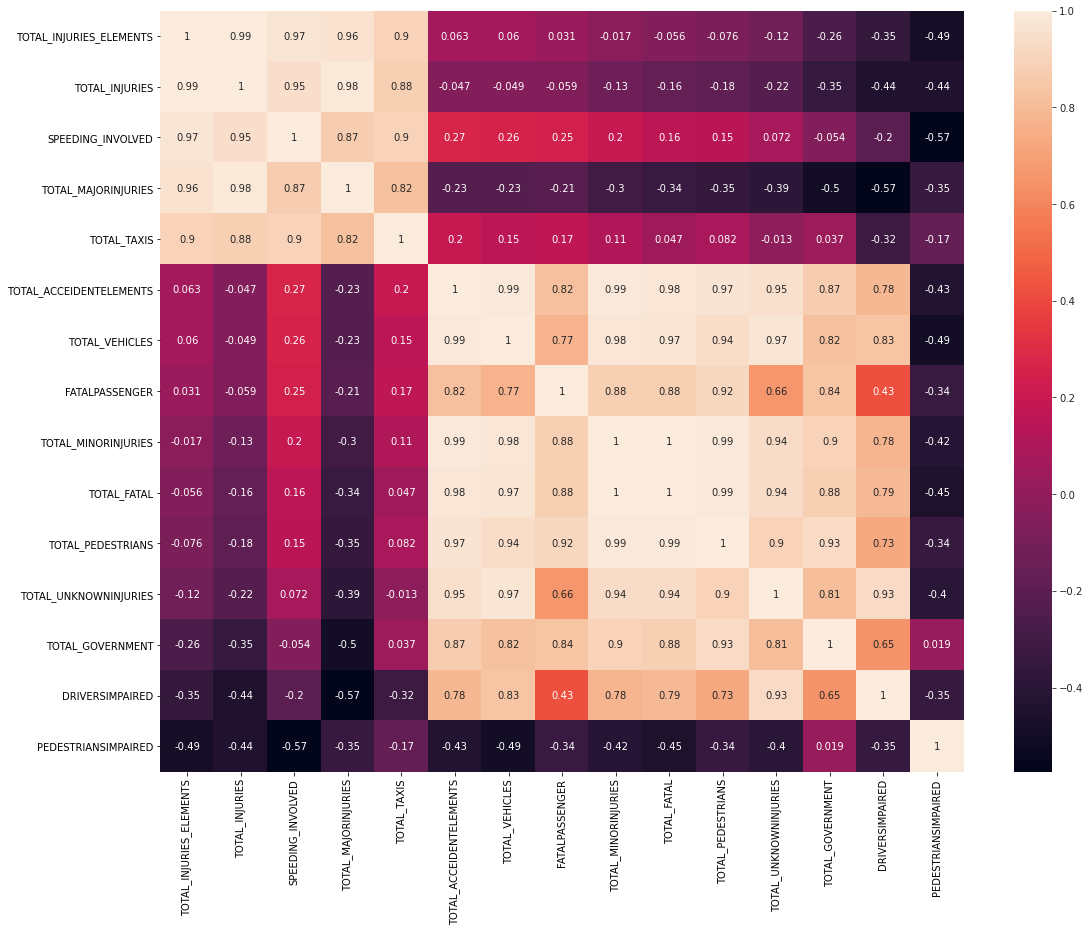

In [46]:
def correlation_map(data, method):
    
    
    corr = mean_sub_lable2.corr(method)
    ix = corr.sort_values('TOTAL_INJURIES_ELEMENTS', ascending=False).index
    df_sorted_by_correlation = data.loc[:, ix]
    
    corr = df_sorted_by_correlation.corr(method)
    plt.subplots(figsize=(18,14))
    with sns.axes_style("white"):
        # display a correlation heatmap
        ax = sns.heatmap(corr, annot=True)
    plt.show()
correlation_map(mean_sub_lable2, method="pearson")


In [35]:
corr=mean_sub_lable1.corr()

In [36]:
corr.to_csv('/Volumes/LOVUN/George Mason Files/Fall 2021/AIT 614/project/data/corr1.csv', index=False)

### Create dummy data

In [736]:
data1 = pd.read_csv('/Volumes/LOVUN/George Mason Files/Fall 2021/AIT 614/project/data/data1.csv')

# TEST PART

In [6]:
groupby_rate = data1.groupby('Rate')
for category, value in groupby_rate['TOTAL_INJURIES']:
    print((category, value.count()))

(0, 6)
(1, 49)
(2, 121254)
(3, 115755)
(4, 129)


In [39]:
groupby_rate = df.groupby('Rate')
for category, value in groupby_rate['TOTAL_INJURIES']:
    print((category, value.count()))

('extrem', 6)
('high', 49)
('low', 121254)
('lowest', 115755)
('medium', 129)


# One-Way-ANOVA 

### TOTAL_INJURIES_ELEMENTS -> yes
pvalue= 0.03978326392706038
reject null hypothesis

In [10]:
F, p = stats.f_oneway(mean_sub_lable1 ['TOTAL_INJURIES_ELEMENTS'], mean_sub_lable1 ['DRIVERSIMPAIRED'], mean_sub_lable1 ['SPEEDING_INVOLVED'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.03978326392706038
reject null hypothesis


In [93]:
F, p = stats.f_oneway(mean_sub_lable1 ['TOTAL_INJURIES_ELEMENTS'], mean_sub_lable1 ['TOTAL_FATAL'], mean_sub_lable1 ['SPEEDING_INVOLVED'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.03974364457578219
reject null hypothesis


In [42]:
F, p = stats.f_oneway(mean_sub_lable1 ['TOTAL_ACCEIDENTELEMENTS'], mean_sub_lable1 ['DRIVERSIMPAIRED'], mean_sub_lable1 ['PEDESTRIANSIMPAIRED'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.00015292501238909294
reject null hypothesis


In [68]:
F, p = stats.f_oneway(mean_sub_lable1 ['TOTAL_FATAL'], mean_sub_lable1 ['TOTAL_TAXIS'], mean_sub_lable1 ['DRIVERSIMPAIRED'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.015280381492504522
reject null hypothesis


In [69]:
F, p = stats.f_oneway(mean_sub_lable1 ['TOTAL_FATAL'], mean_sub_lable1 ['TOTAL_GOVERNMENT'], mean_sub_lable1 ['DRIVERSIMPAIRED'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.058585966571955486
accept null hypothesis


In [51]:
F, p = stats.f_oneway(mean_sub_lable1 ['TOTAL_FATAL'], mean_sub_lable1 ['TOTAL_TAXIS'], mean_sub_lable1 ['SPEEDING_INVOLVED'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.04698178558390334
reject null hypothesis


In [52]:
F, p = stats.f_oneway(mean_sub_lable1 ['TOTAL_FATAL'], mean_sub_lable1 ['TOTAL_GOVERNMENT'], mean_sub_lable1 ['SPEEDING_INVOLVED'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.11406217124519855
accept null hypothesis


In [54]:
F, p = stats.f_oneway(mean_sub_lable1 ['FATALPASSENGER'], mean_sub_lable1 ['TOTAL_TAXIS'], mean_sub_lable1 ['SPEEDING_INVOLVED'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.03778818052396843
reject null hypothesis


In [56]:
F, p = stats.f_oneway(mean_sub_lable1 ['TOTAL_MAJORINJURIES'], mean_sub_lable1 ['PEDESTRIANSIMPAIRED'], mean_sub_lable1 ['SPEEDING_INVOLVED'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.2887451367934406
accept null hypothesis


In [28]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'CRIMEID', 'CCN', 'REPORTDATE', 'ROUTEID',
       'MEASURE', 'OFFSET', 'FROMDATE', 'MARID', 'ADDRESS', 'LATITUDE',
       'LONGITUDE', 'XCOORD', 'YCOORD', 'EVENTID', 'MAJORINJURIES_BICYCLIST',
       'MINORINJURIES_BICYCLIST', 'UNKNOWNINJURIES_BICYCLIST',
       'FATAL_BICYCLIST', 'MAJORINJURIES_DRIVER', 'MINORINJURIES_DRIVER',
       'UNKNOWNINJURIES_DRIVER', 'FATAL_DRIVER', 'MAJORINJURIES_PEDESTRIAN',
       'MINORINJURIES_PEDESTRIAN', 'UNKNOWNINJURIES_PEDESTRIAN',
       'FATAL_PEDESTRIAN', 'TOTAL_VEHICLES', 'TOTAL_BICYCLES',
       'TOTAL_PEDESTRIANS', 'PEDESTRIANSIMPAIRED', 'BICYCLISTSIMPAIRED',
       'DRIVERSIMPAIRED', 'TOTAL_TAXIS', 'TOTAL_GOVERNMENT',
       'SPEEDING_INVOLVED', 'NEARESTINTROUTEID', 'NEARESTINTSTREETNAME',
       'OFFINTERSECTION', 'INTAPPROACHDIRECTION', 'FATALPASSENGER',
       'MAJORINJURIESPASSENGER', 'MINORINJURIESPASSENGER',
       'UNKNOWNINJURIESPASSENGER', 'TOTAL_FATAL', 'TOTAL_MAJORINJURIES',
       'TOTAL_MINORINJURIES',

# MANOVA

In [11]:
mean_sub_lable1

Rate       ADDRESS         XCOORD         YCOORD  MAJORINJURIES_BICYCLIST  \
0     0  69336.500000  399715.840833  135626.020333                 0.000000   
1     1  45449.306122  399928.826612  136522.968510                 0.000000   
2     2  45895.235967  399242.549781  137446.187120                 0.003142   
3     3  45867.738353  399277.150188  137402.129489                 0.000017   
4     4  44469.604651  400550.746899  135994.448000                 0.000000   

   MINORINJURIES_BICYCLIST  UNKNOWNINJURIES_BICYCLIST  FATAL_BICYCLIST  \
0                 0.000000                   0.000000         0.000000   
1                 0.000000                   0.000000         0.000000   
2                 0.021484                   0.001113         0.000049   
3                 0.000017                   0.000000         0.000052   
4                 0.000000                   0.000000         0.000000   

   MAJORINJURIES_DRIVER  MINORINJURIES_DRIVER  ...  MINORINJURIESPASSENGER  \
0              0.166667              0.000000  ...                0.333333   
1              0.428571              1.408163  ...                4.061224   
2              0.132218              0.324806  ...                0.149867   
3              0.006522              0.016302  ...                0.002445   
4              0.496124              1.178295  ...                2.465116   

   UNKNOWNINJURIESPASSENGER  TOTAL_FATAL  TOTAL_MAJORINJURIES  \
0                  0.000000     0.000000            40.166667   
1                  0.816327     0.061224             3.836735   
2                  0.017030     0.001748             0.201940   
3                  0.000492     0.002212             0.007352   
4                  0.744186     0.038760             1.658915   

   TOTAL_MINORINJURIES  TOTAL_UNKNOWNINJURIES  TOTAL_ACCEIDENTELEMENTS  \
0             0.333333               0.000000                 2.666667   
1             5.938776               1.061224                 6.122449   
2             0.554266               0.142973                 2.584236   
3             0.018867               0.005391                 1.886208   
4             3.806202               1.155039                 5.093023   

   TOTAL_INJURIES  TOTAL_INJURIES_ELEMENTS     FATAL  
0       40.500000                43.166667  0.000000  
1       10.836735                16.959184  0.040816  
2        0.899179                 3.483415  0.001691  
3        0.031610                 1.917818  0.002168  
4        6.620155                11.713178  0.038760  

[5 rows x 41 columns]

In [58]:
from statsmodels.multivariate.manova import MANOVA
maov=MANOVA.from_formula('Rate  ~  TOTAL_INJURIES_ELEMENTS + TOTAL_ACCEIDENTELEMENTS  + TOTAL_MAJORINJURIES + TOTAL_MINORINJURIES + TOTAL_FATAL', data=df)
print(maov.mv_test())

                                   Multivariate linear model
                                                                                               
-----------------------------------------------------------------------------------------------
       Intercept               Value         Num DF    Den DF           F Value          Pr > F
-----------------------------------------------------------------------------------------------
          Wilks' lambda              -0.0000 5.0000 237183.0000 -651327603913837824.0000 1.0000
         Pillai's trace               1.0000 5.0000 237183.0000 -651327603913837952.0000 1.0000
 Hotelling-Lawley trace -13730486668813.4883 5.0000 237183.0000 -651327603913837824.0000 1.0000
    Roy's greatest root -13730486668813.4883 5.0000 237183.0000 -651327603913837952.0000 1.0000
-----------------------------------------------------------------------------------------------
                                                                           

In [76]:
from statsmodels.multivariate.manova import MANOVA
maov=MANOVA.from_formula('Rate  ~  DRIVERSIMPAIRED + SPEEDING_INVOLVED  + TOTAL_FATAL + TOTAL_TAXIS + TOTAL_GOVERNMENT', data=df)
print(maov.mv_test())

                                   Multivariate linear model
                                                                                                
------------------------------------------------------------------------------------------------
       Intercept               Value         Num DF    Den DF            F Value          Pr > F
------------------------------------------------------------------------------------------------
          Wilks' lambda               0.0000 5.0000 237183.0000 21363545408372281344.0000 0.0000
         Pillai's trace               1.0000 5.0000 237183.0000 21363545408372281344.0000 0.0000
 Hotelling-Lawley trace 450359962737048.6250 5.0000 237183.0000 21363545408372281344.0000 0.0000
    Roy's greatest root 450359962737048.6250 5.0000 237183.0000 21363545408372281344.0000 0.0000
------------------------------------------------------------------------------------------------
                                                                  

In [65]:
df['FATAL'] = df['FATAL'].astype(object)

# Regression

In [50]:
mean_sub_lable1.columns

Index(['Rate', 'ADDRESS', 'XCOORD', 'YCOORD', 'MAJORINJURIES_BICYCLIST',
       'MINORINJURIES_BICYCLIST', 'UNKNOWNINJURIES_BICYCLIST',
       'FATAL_BICYCLIST', 'MAJORINJURIES_DRIVER', 'MINORINJURIES_DRIVER',
       'UNKNOWNINJURIES_DRIVER', 'FATAL_DRIVER', 'MAJORINJURIES_PEDESTRIAN',
       'MINORINJURIES_PEDESTRIAN', 'UNKNOWNINJURIES_PEDESTRIAN',
       'FATAL_PEDESTRIAN', 'TOTAL_VEHICLES', 'TOTAL_BICYCLES',
       'TOTAL_PEDESTRIANS', 'PEDESTRIANSIMPAIRED', 'BICYCLISTSIMPAIRED',
       'DRIVERSIMPAIRED', 'TOTAL_TAXIS', 'TOTAL_GOVERNMENT',
       'SPEEDING_INVOLVED', 'NEARESTINTROUTEID', 'NEARESTINTSTREETNAME',
       'OFFINTERSECTION', 'INTAPPROACHDIRECTION', 'FATALPASSENGER',
       'MAJORINJURIESPASSENGER', 'MINORINJURIESPASSENGER',
       'UNKNOWNINJURIESPASSENGER', 'TOTAL_FATAL', 'TOTAL_MAJORINJURIES',
       'TOTAL_MINORINJURIES', 'TOTAL_UNKNOWNINJURIES',
       'TOTAL_ACCEIDENTELEMENTS', 'TOTAL_INJURIES', 'TOTAL_INJURIES_ELEMENTS',
       'FATAL'],
      dtype='object')

In [56]:
from statsmodels.formula.api import ols
x= mean_sub_lable1[['TOTAL_GOVERNMENT','TOTAL_TAXIS','SPEEDING_INVOLVED','DRIVERSIMPAIRED']]
y= mean_sub_lable1['TOTAL_FATAL']
model = ols("y ~ x", mean_sub_lable1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 30 Nov 2021   Prob (F-statistic):                nan
Time:                        23:00:35   Log-Likelihood:                 184.23
No. Observations:                   5   AIC:                            -358.5
Df Residuals:                       0   BIC:                            -360.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0101        inf         -0        n

/Users/zaidal-tukhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [18]:
from statsmodels.formula.api import ols
x= mean_sub_lable1[['TOTAL_FATAL','TOTAL_GOVERNMENT','SPEEDING_INVOLVED']]
y= mean_sub_lable1['TOTAL_ACCEIDENTELEMENTS']
model = ols("y ~ x", mean_sub_lable1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     13.68
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.196
Time:                        23:03:18   Log-Likelihood:               -0.21417
No. Observations:                   5   AIC:                             8.428
Df Residuals:                       1   BIC:                             6.866
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9305      0.573      3.367      0.1

/Users/zaidal-tukhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [100]:

#Determine pivot table
impute_grps = mean_sub_lable1.pivot_table(values=["Rate"], index=["TOTAL_ACCEIDENTELEMENTS",'TOTAL_UNKNOWNINJURIES','TOTAL_MINORINJURIES','TOTAL_MAJORINJURIES',"TOTAL_FATAL"], aggfunc=np.mean)
impute_grps

Rate
TOTAL_ACCEIDENTELEMENTS TOTAL_UNKNOWNINJURIES TOTAL_MINORINJURIES TOTAL_MAJORINJURIES TOTAL_FATAL      
1.886208                0.005391              0.018867            0.007352            0.002212        3
2.584236                0.142973              0.554266            0.201940            0.001748        2
2.666667                0.000000              0.333333            40.166667           0.000000        0
5.093023                1.155039              3.806202            1.658915            0.038760        4
6.122449                1.061224              5.938776            3.836735            0.061224        1

# Decision Tree

In [6]:
df.head()

X          Y   OBJECTID   CRIMEID       CCN  \
0 -77.012309  38.883767  232751353  28437811  20087579   
1 -77.061186  38.905239  232751354  28437812  20087117   
2 -77.038511  38.903591  232751355  28437819  20087584   
3 -77.006172  38.824301  232751356  28437830  20087570   
4 -77.051487  38.897180  232751357  28437840  20087610   

                 REPORTDATE          ROUTEID  MEASURE  OFFSET  \
0 2020-06-13 20:37:33+00:00         15048461  2380.00    0.83   
1 2020-06-13 20:38:01+00:00         11003102   288.30    3.83   
2 2020-06-13 21:06:15+00:00         11001702  1669.82   20.83   
3 2020-06-13 22:45:04+00:00         15081252  7507.86    2.95   
4 2020-06-13 22:19:36+00:00  Route not found     0.00    0.00   

                   FROMDATE  ... UNKNOWNINJURIESPASSENGER TOTAL_FATAL  \
0 2020-06-13 04:00:00+00:00  ...                        0           0   
1 2020-06-12 04:00:00+00:00  ...                        0           0   
2 2020-06-12 04:00:00+00:00  ...                        0           0   
3 2020-06-13 04:00:00+00:00  ...                        0           0   
4 2020-06-13 04:00:00+00:00  ...                        0           0   

   TOTAL_MAJORINJURIES  TOTAL_MINORINJURIES  TOTAL_UNKNOWNINJURIES  \
0                    0                    0                      0   
1                    0                    0                      0   
2                    0                    0                      0   
3                    0                    1                      0   
4                    0                    0                      0   

   TOTAL_ACCEIDENTELEMENTS FATAL  TOTAL_INJURIES  TOTAL_INJURIES_ELEMENTS  \
0                        3     0               0                        3   
1                        2     0               0                        2   
2                        2     0               0                        2   
3                        2     0               1                        3   
4                        2     0               0                        2   

     Rate  
0     low  
1  lowest  
2  lowest  
3     low  
4  lowest  

[5 rows x 55 columns]

In [7]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [8]:
fatal=df[(df.FATAL == 1)][['TOTAL_VEHICLES', 'TOTAL_BICYCLES','SPEEDING_INVOLVED', 
       'TOTAL_PEDESTRIANS', 'PEDESTRIANSIMPAIRED', 'BICYCLISTSIMPAIRED',
       'DRIVERSIMPAIRED', 'TOTAL_TAXIS', 'TOTAL_GOVERNMENT',
       'MAJORINJURIESPASSENGER', 'MINORINJURIESPASSENGER',
       'UNKNOWNINJURIESPASSENGER', 'TOTAL_VEHICLES',
       'TOTAL_ACCEIDENTELEMENTS', 'TOTAL_INJURIES', 'TOTAL_INJURIES_ELEMENTS','FATAL']]

In [9]:
#split dataset in features and target variable
feature_cols =[
       'TOTAL_VEHICLES', 'TOTAL_BICYCLES','SPEEDING_INVOLVED', 
       'TOTAL_PEDESTRIANS', 'PEDESTRIANSIMPAIRED', 'BICYCLISTSIMPAIRED',
       'DRIVERSIMPAIRED', 'TOTAL_TAXIS', 'TOTAL_GOVERNMENT',
       'MAJORINJURIESPASSENGER', 'MINORINJURIESPASSENGER',
       'UNKNOWNINJURIESPASSENGER', 'TOTAL_VEHICLES',
       'TOTAL_ACCEIDENTELEMENTS', 'TOTAL_INJURIES', 'TOTAL_INJURIES_ELEMENTS']
X = df[feature_cols] # Features
y = df['FATAL'].values # Target variable


In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) # 60% training and 30% test


In [11]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [12]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9980185079786673


In [13]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
import pydotplus
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


In [79]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Accuracy: 0.9980466005227803

Accuracy: 0.9980817470857312


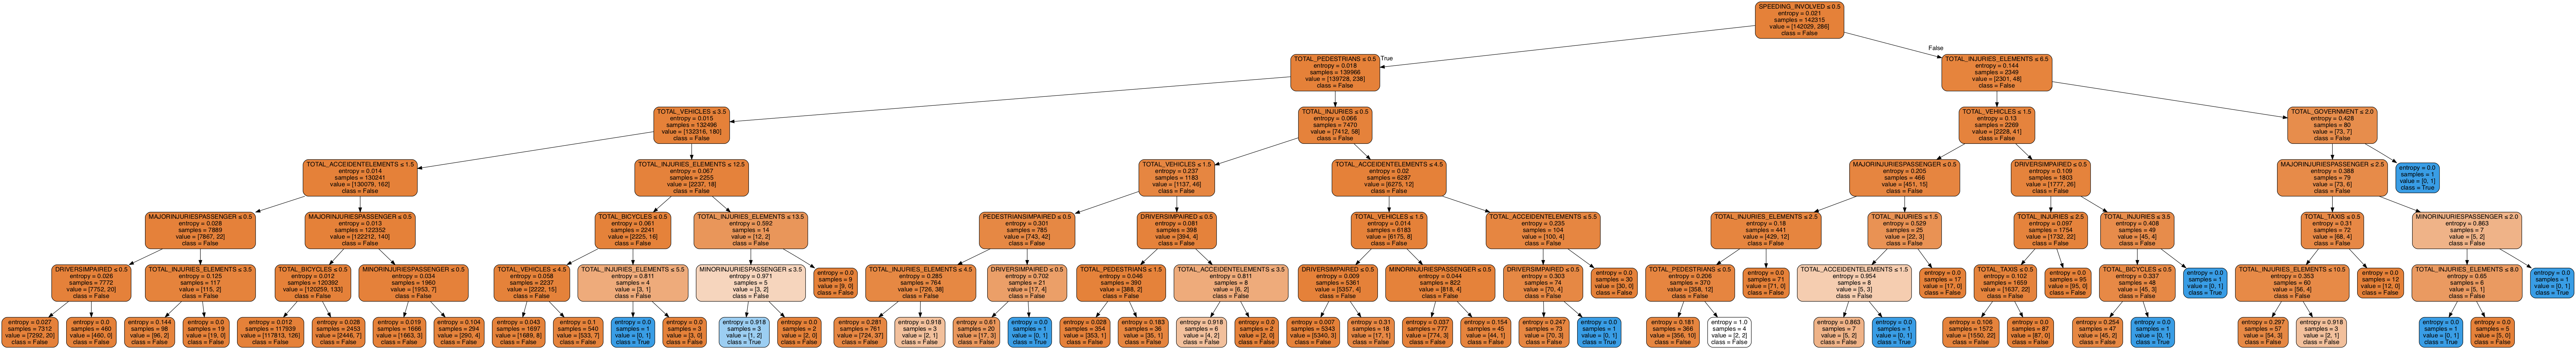

In [80]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['False','True'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [25]:
df[['TOTAL_FATAL',	'TOTAL_MAJORINJURIES',	'TOTAL_UNKNOWNINJURIES',	'TOTAL_ACCEIDENTELEMENTS',	'TOTAL_INJURIES',	'TOTAL_INJURIES_ELEMENTS']].describe()

TOTAL_FATAL  TOTAL_MAJORINJURIES  TOTAL_UNKNOWNINJURIES  \
count  237193.000000        237193.000000          237193.000000   
mean        0.002007             0.109531               0.076566   
std         0.045961             0.459874               0.311264   
min         0.000000             0.000000               0.000000   
25%         0.000000             0.000000               0.000000   
50%         0.000000             0.000000               0.000000   
75%         0.000000             0.000000               0.000000   
max         2.000000            51.000000              16.000000   

       TOTAL_ACCEIDENTELEMENTS  TOTAL_INJURIES  TOTAL_INJURIES_ELEMENTS  
count            237193.000000   237193.000000            237193.000000  
mean                  2.245682        0.481954                 2.727635  
std                   0.663670        0.838257                 1.096224  
min                   0.000000        0.000000                 1.000000  
25%                   2.000000        0.000000                 2.000000  
50%                   2.000000        0.000000                 3.000000  
75%                   3.000000        1.000000                 3.000000  
max                  17.000000       51.000000                55.000000

In [135]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



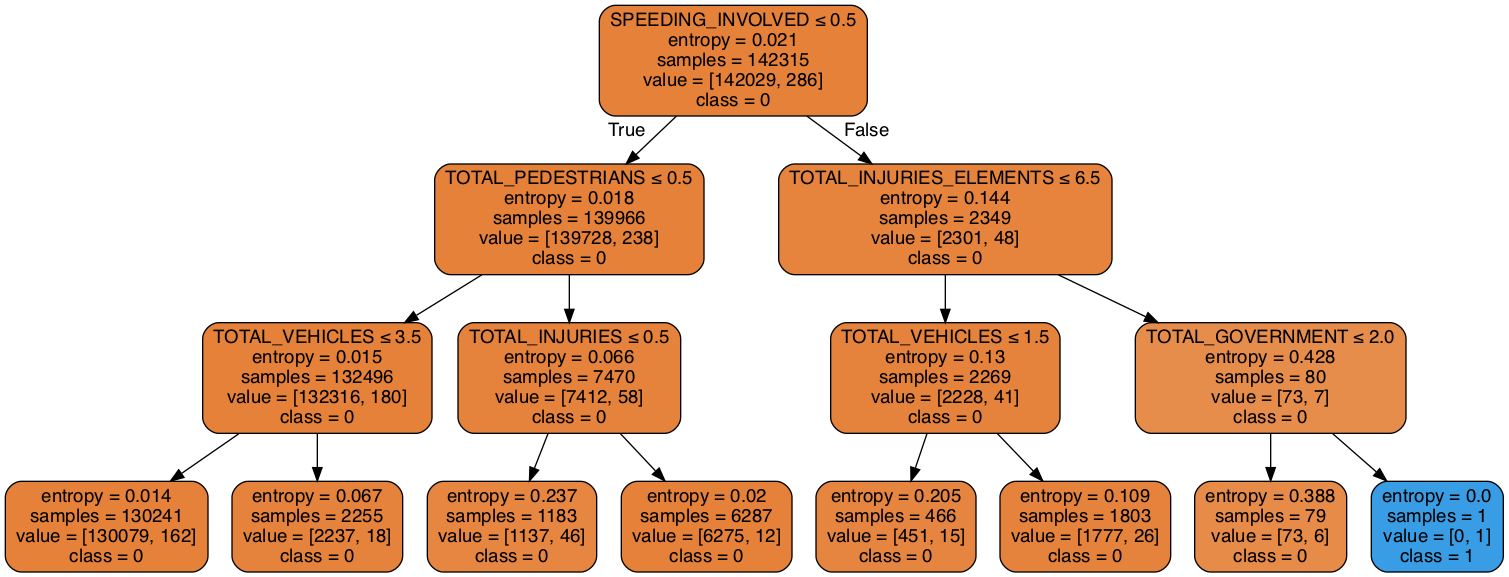

In [30]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [102]:
mean_sub_lable1.columns

Index(['Rate', 'ADDRESS', 'XCOORD', 'YCOORD', 'MAJORINJURIES_BICYCLIST',
       'MINORINJURIES_BICYCLIST', 'UNKNOWNINJURIES_BICYCLIST',
       'FATAL_BICYCLIST', 'MAJORINJURIES_DRIVER', 'MINORINJURIES_DRIVER',
       'UNKNOWNINJURIES_DRIVER', 'FATAL_DRIVER', 'MAJORINJURIES_PEDESTRIAN',
       'MINORINJURIES_PEDESTRIAN', 'UNKNOWNINJURIES_PEDESTRIAN',
       'FATAL_PEDESTRIAN', 'TOTAL_VEHICLES', 'TOTAL_BICYCLES',
       'TOTAL_PEDESTRIANS', 'PEDESTRIANSIMPAIRED', 'BICYCLISTSIMPAIRED',
       'DRIVERSIMPAIRED', 'TOTAL_TAXIS', 'TOTAL_GOVERNMENT',
       'SPEEDING_INVOLVED', 'NEARESTINTROUTEID', 'NEARESTINTSTREETNAME',
       'OFFINTERSECTION', 'INTAPPROACHDIRECTION', 'FATALPASSENGER',
       'MAJORINJURIESPASSENGER', 'MINORINJURIESPASSENGER',
       'UNKNOWNINJURIESPASSENGER', 'TOTAL_FATAL', 'TOTAL_MAJORINJURIES',
       'TOTAL_MINORINJURIES', 'TOTAL_UNKNOWNINJURIES',
       'TOTAL_ACCEIDENTELEMENTS', 'TOTAL_INJURIES', 'TOTAL_INJURIES_ELEMENTS'],
      dtype='object')

In [78]:
sample=df.sample(50)